## Regularization Methods Example 2.3:
In order to fit a lasso model, we use the **sklearn.linear\_model.Lasso()** function, which behaves very similar to the **Ridge()** function. 

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
import warnings
warnings.filterwarnings("ignore")

# Load data
df = pd.read_csv('./data/Credit.csv', index_col="Unnamed: 0")

# Convert Categorical variables
df = pd.get_dummies(data=df, drop_first=True, 
                    prefix=('Gender_', 'Student_', 
                            'Married_', 'Ethnicity_'))

# Define target and predictors
x = df.drop(columns='Balance') 
y = df['Balance']

# Fit model:
lambda_ = 5
reg = Lasso(alpha=lambda_) #, normalize=True)
reg = reg.fit(x, y)

# Coefficient and corresponding predictors
coef = np.round(reg.coef_, 3)
x_cols = x.columns.values

We expect the coefficient estimates to be much smaller, in terms of $\ell_2$ norm, when a large value of $\lambda$ is used, as compared to when a small value of $\lambda$ is used. These are the coefficients when $\lambda = 5$, along with their $\ell_2$ norm:

In [2]:
print(pd.DataFrame(data={'Feature': x_cols,
                         'Coefficient':coef}),
      '\n\nl2-norm:', np.sqrt(np.sum(coef**2)))

                 Feature  Coefficient
0                 Income       -7.771
1                  Limit        0.174
2                 Rating        1.380
3                  Cards       13.813
4                    Age       -0.633
5              Education       -0.248
6           Gender__Male        0.000
7           Student__Yes      369.040
8           Married__Yes       -0.000
9       Ethnicity__Asian        0.000
10  Ethnicity__Caucasian       -0.000 

l2-norm: 369.3834131075731


In contrast, here are the coefficients when $\lambda = 0.5$, along with their $\ell_2$ norm. Note the much higher $\ell_2$ norm of the coefficients associated with this lower value of $\lambda$.

In [3]:
# Fit model:
lambda_ = 0.5
reg = Lasso(alpha=lambda_) #, normalize=True)
reg = reg.fit(x, y)

# Coefficient and corresponding predictors
coef = np.round(reg.coef_, 3)
x_cols = x.columns.values

print(pd.DataFrame(data={'Feature': x_cols,
                         'Coefficient':coef}),
      '\n\nl2-norm:', np.sqrt(np.sum(coef**2)))

                 Feature  Coefficient
0                 Income       -7.801
1                  Limit        0.191
2                 Rating        1.135
3                  Cards       17.475
4                    Age       -0.619
5              Education       -1.039
6           Gender__Male        8.417
7           Student__Yes      420.253
8           Married__Yes       -6.179
9       Ethnicity__Asian       10.455
10  Ethnicity__Caucasian        4.735 

l2-norm: 420.9778566658821


As we can observe, several coefficients have become zero. The larger the value of $\lambda$ the more coefficients become zero. Variable selection thus is generically implemented in the lasso.

### Figure

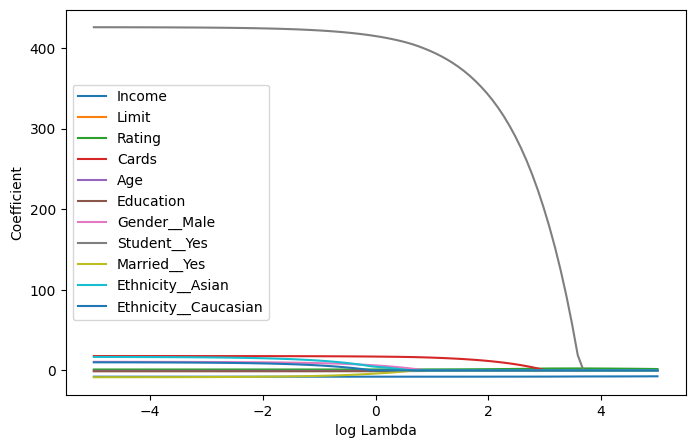

In [4]:
import matplotlib.pyplot as plt

# Model for different lambda
n = 100
lambda_ = np.exp(np.linspace(-5, 5, n))

params = pd.DataFrame(columns=x.columns)
for i in range(n):
    reg = Lasso(alpha=lambda_[i]) #, normalize=True)
    reg = reg.fit(x, y)
    params.loc[np.log(lambda_[i]), :] = reg.coef_
    
# Plot
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)
params.plot(ax=ax)
plt.xlabel("log Lambda")
plt.ylabel("Coefficient")
plt.legend()
plt.show()